In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt
from pathlib import Path
import os
import re

In [2]:
path_data_root = Path("./results-model")
paths_csv = filter(lambda x : x.is_dir and x.stem[-13:] == "Scomputations", path_data_root.iterdir())
# get all data folders
data_tags = [x.stem[:-14] for x in paths_csv]

In [3]:
# override
data_tags = ['ZAMBALES']

In [4]:
def find_optimal_parameters(csv_file):
    df = pd.read_csv(csv_file,index_col=[0])
    idx_min = df.idxmin()["S"]
    return df.iloc[[idx_min]].rename((csv_file +'.{}').format)

In [5]:
%%time
param_distribs = {}
for tag in data_tags:
    minS = pd.DataFrame(columns=['f_i', 'f_e','alpha','S'])
    for it in range(1, 101):
        minS = pd.concat((minS, find_optimal_parameters(f"results-model/{tag}-Scomputations/iteration{it}.csv")))
    minS.to_csv(f"results-model/{tag}-min-per-iteration.csv")
    param_distribs[tag] = minS

CPU times: total: 18.9 s
Wall time: 29.7 s


In [6]:
 # combined data frame
cdf = pd.concat([param_distribs[tag].assign(Set=tag) for tag in data_tags])
# melted data frame
mdf = pd.melt(cdf, id_vars=["Set"])
mdf

,Set,variable,value
0,ZAMBALES,f_i,0.010000
1,ZAMBALES,f_i,0.010000
2,ZAMBALES,f_i,0.000000
3,ZAMBALES,f_i,0.010000
4,ZAMBALES,f_i,0.010000
...,...,...,...
395,ZAMBALES,S,37.033861
396,ZAMBALES,S,37.622851
397,ZAMBALES,S,36.707026
398,ZAMBALES,S,36.333872


In [7]:
mdf

,Set,variable,value
0,ZAMBALES,f_i,0.010000
1,ZAMBALES,f_i,0.010000
2,ZAMBALES,f_i,0.000000
3,ZAMBALES,f_i,0.010000
4,ZAMBALES,f_i,0.010000
...,...,...,...
395,ZAMBALES,S,37.033861
396,ZAMBALES,S,37.622851
397,ZAMBALES,S,36.707026
398,ZAMBALES,S,36.333872


In [8]:
formatted_mdf = mdf.replace(to_replace="f_i", value="$f_i$").replace(to_replace="f_e", value="$f_e$")

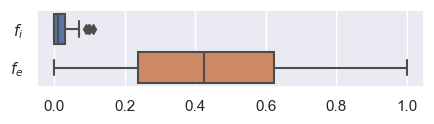

In [9]:
sns.set(rc={'figure.figsize':(5,1)})
sns.boxplot(x="value", y ="variable", data=formatted_mdf.query("variable == '$f_e$' or variable == '$f_i$'")).set(
    xlabel='', ylabel="", xlim = (-0.05,1.05)
)
plt.savefig("brg-nationwide-parameter-estimated.png")

In [10]:
formatted_mdf.query("variable == '$f_e$'")["value"].describe()

count    100.000000
mean       0.443700
std        0.263618
min        0.000000
25%        0.237500
50%        0.425000
75%        0.625000
max        1.000000
Name: value, dtype: float64

In [11]:
minS["f_e"]

results-model/ZAMBALES-Scomputations/iteration1.csv.7615       0.48
results-model/ZAMBALES-Scomputations/iteration2.csv.8544       0.66
results-model/ZAMBALES-Scomputations/iteration3.csv.2370       0.46
results-model/ZAMBALES-Scomputations/iteration4.csv.8294       0.61
results-model/ZAMBALES-Scomputations/iteration5.csv.6026       0.17
                                                               ... 
results-model/ZAMBALES-Scomputations/iteration96.csv.1925      0.37
results-model/ZAMBALES-Scomputations/iteration97.csv.7783      0.51
results-model/ZAMBALES-Scomputations/iteration98.csv.8113      0.58
results-model/ZAMBALES-Scomputations/iteration99.csv.5600      0.08
results-model/ZAMBALES-Scomputations/iteration100.csv.10131    0.97
Name: f_e, Length: 100, dtype: float64

In [12]:
scipy.stats.describe(minS["f_e"])

DescribeResult(nobs=100, minmax=(0.0, 1.0), mean=0.44369999999999993, variance=0.06949425252525251, skewness=0.2055385264895753, kurtosis=-0.8416161442543064)

In [13]:
0.3942/np.sqrt(0.06759632323232324)

1.5161950796809518

# Boxplot comparison

In [14]:
mdf.query("variable == 'f_i'")

,Set,variable,value
0,ZAMBALES,f_i,0.01
1,ZAMBALES,f_i,0.01
2,ZAMBALES,f_i,0.00
3,ZAMBALES,f_i,0.01
4,ZAMBALES,f_i,0.01
...,...,...,...
95,ZAMBALES,f_i,0.00
96,ZAMBALES,f_i,0.01
97,ZAMBALES,f_i,0.01
98,ZAMBALES,f_i,0.01
